### 감성 분석 : Sentimetal Analysis
#### [1] 데이터 준비

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data loading
FILE = '../DATA/imdb_reviews.csv'

In [3]:
imdb_DF = pd.read_csv(FILE)

In [4]:
# check data
imdb_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [5]:
imdb_DF.head()

,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0
3,One of the most unheralded great works of anim...,1
4,"It was the Sixties, and anyone with long hair ...",0


In [6]:
# sentiment data distribution rate
imdb_DF.sentiment.value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

#### [2] 데이터 전처리

##### [2-1] 기본적인 데이터 전처리 : 결측치, 중복값, 이상값 노이즈, ...

In [7]:
# check & deal with missing data
imdb_DF.isnull().sum()

review       0
sentiment    0
dtype: int64

In [8]:
# check & deal with duplicated value
imdb_DF.duplicated().sum()

418

In [9]:
imdb_DF.review.duplicated().sum()

418

In [10]:
dfDDF = imdb_DF[imdb_DF.review.duplicated()]

In [11]:
dfDDF.iloc[0]

review       I've read the book 'Scarlett' and was expectin...
sentiment                                                    0
Name: 6530, dtype: object

In [12]:
dfDDF.review.value_counts()

Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.                                                                                                                                                                                                                

In [13]:
imdb_DF.drop_duplicates(subset=['review'], inplace=True)

##### [2-2] 텍스트 데이터 전처리 : 특정문자 외 제외, 구두점, 불용어 처리, ...

In [14]:
# Delete except word of text language : ENG a ~ z ==> 대/소문자 중 하나로 통일
imdb_DF.head(3)

,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0


In [15]:
# review 컬럼에 대한 소문자 변환
imdb_DF.review.str.lower()

0        my family and i normally do not watch local mo...
1        believe it or not, this was at one time the wo...
2        after some internet surfing, i found the "home...
3        one of the most unheralded great works of anim...
4        it was the sixties, and anyone with long hair ...
                               ...                        
49995    the people who came up with this are sick and ...
49996    the script is so so laughable... this in turn,...
49997    "so there's this bride, you see, and she gets ...
49998    your mind will not be satisfied by this nobud...
49999    the chaser's war on everything is a weekly sho...
Name: review, Length: 49582, dtype: object

In [16]:
# review 컬럼에서 a ~ z와 공백을 제외한 모든 것 삭제
#              공백!
regEng = '[^a-z ]'
imdb_DF.review = imdb_DF.review.str.replace(regEng, '', regex=True)

In [17]:
imdb_DF.review

0        y family and  normally do not watch local movi...
1        elieve it or not this was at one time the wors...
2        fter some internet surfing  found the omefront...
3        ne of the most unheralded great works of anima...
4        t was the ixties and anyone with long hair and...
                               ...                        
49995    the people who came up with this are     how t...
49996    he script is so so laughable this in turn make...
49997    o theres this bride you see and she gets crush...
49998    our mind will not be satisfied by this nobudge...
49999    he chasers war on everything is a weekly show ...
Name: review, Length: 49582, dtype: object

In [18]:
# review 컬럼에서 구두점 및 특수문자 제거
regPun = '[!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n]'
imdb_DF.review = imdb_DF.review.str.replace(regEng, '', regex=True)

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
# 불용어 제거 ==> 분석하는 텍스트 데이터에 따라서 추가 및 삭제 가능
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.append('br')

print(f'불용어 개수 : {len(stop_words)}', stop_words, sep='\n')

불용어 개수 : 180
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [21]:
sw_remove = ' '.join([word for word in imdb_DF.review[0].split() if word not in stop_words])

In [22]:
sw_remove

'family normally watch local movies simple reason poorly made lack depth worth timebr trailer asaan ka man caught attention daughter laws daughters took time watch afternoon movie exceeded expectations cinematography good story beautiful acting awesome ericho osales really good sos laudine arretto fact despised iether campo proves effective role never touched moved affected local movie magine cynic like dabbing eyes end movie ongratulations tar inema ay go ericho laudine'

In [23]:
sw_remove_review = []

for review in imdb_DF.review:
    sw_remove_review.append(' '.join([word for word in review.split() if word not in stop_words]))

In [24]:
imdb_DF.review = sw_remove_review

In [25]:
sw_remove_review2 = [[word for word in review.split() if word not in stop_words] for review in imdb_DF.review] 

In [26]:
imdb_DF.review

0        family normally watch local movies simple reas...
1        elieve one time worst movie ever seen ince tim...
2        fter internet surfing found omefront series io...
3        ne unheralded great works animation hough make...
4        ixties anyone long hair hip distant attitude c...
                               ...                        
49995    people came hell exploit people like tricking ...
49996    script laughable turn makes actors lines sound...
49997    theres bride see gets crushed death statue fal...
49998    mind satisfied nobudget doomsday thriller pray...
49999    chasers war everything weekly show guys brough...
Name: review, Length: 49582, dtype: object

#### [3] 학습용 데이터 가공

##### [3-1] 텍스트 데이터 ==> 수치화 : 토큰화, 벡터화
- 텍스트 데이터와 맵핑될 숫자 테이블 생성 ==> 단어 사전 (Voca)

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [28]:
# 토큰화 시 상수
OOV = '<OOV>'

In [29]:
# 텍스트 데이터 전용 사전 생성 ==> VOCA
tk = Tokenizer(oov_token=OOV)

In [30]:
tk.fit_on_texts(imdb_DF.review)

In [31]:
# 텍스트 데이터에 존재하는 단어 수
VOCA_SIZE = len(tk.word_index)
print(f'사전 단어 수 : {len(tk.word_index)}')

사전 단어 수 : 179964


- 분석에 사용할 단어 수 => WORD_NUMS

In [32]:
# 단어의 빈도
sorted(tk.word_counts.items(), key = (lambda x : x[1]), reverse=True)

[('movie', 82061),
 ('film', 73032),
 ('one', 47026),
 ('like', 37210),
 ('good', 27229),
 ('would', 23559),
 ('time', 22578),
 ('really', 22048),
 ('see', 21571),
 ('even', 21537),
 ('story', 21266),
 ('much', 18233),
 ('get', 17620),
 ('bad', 16572),
 ('people', 16536),
 ('great', 16400),
 ('well', 15618),
 ('n', 15324),
 ('first', 15186),
 ('movies', 15113),
 ('made', 15098),
 ('also', 15084),
 ('make', 14982),
 ('films', 14959),
 ('could', 14752),
 ('way', 14633),
 ('e', 14600),
 ('ut', 14571),
 ('dont', 14484),
 ('characters', 14342),
 ('think', 13826),
 ('nd', 13648),
 ('f', 13327),
 ('ts', 13100),
 ('seen', 12877),
 ('character', 12723),
 ('watch', 12462),
 ('many', 12445),
 ('know', 12027),
 ('acting', 12022),
 ('never', 12020),
 ('plot', 12010),
 ('two', 11974),
 ('ever', 11733),
 ('little', 11474),
 ('love', 11415),
 ('show', 11334),
 ('best', 11259),
 ('life', 10975),
 ('better', 10736),
 ('say', 10409),
 ('scene', 10373),
 ('end', 10195),
 ('scenes', 10007),
 ('hat', 9687),

In [33]:
wordFreq = pd.DataFrame(tk.word_counts.items())

In [34]:
wordFreq.head()

,0,1
0,family,5133
1,normally,421
2,watch,12462
3,local,1696
4,movies,15113


In [35]:
wordFreq[1].value_counts()

1        98331
2        19580
3         9816
4         6210
5         4509
         ...  
4144         1
11415        1
1482         1
4309         1
437          1
Name: 1, Length: 1724, dtype: int64

In [36]:
wordFreq[wordFreq[1]>=100].shape

(6864, 2)

In [37]:
WORD_NUMS = wordFreq[wordFreq[1] >= 500].shape[0]

print(f'분석에 사용할 단어 수 : {WORD_NUMS}')

분석에 사용할 단어 수 : 1809


In [38]:
wordFreq[1].min(), wordFreq[1].max()

(1, 82061)

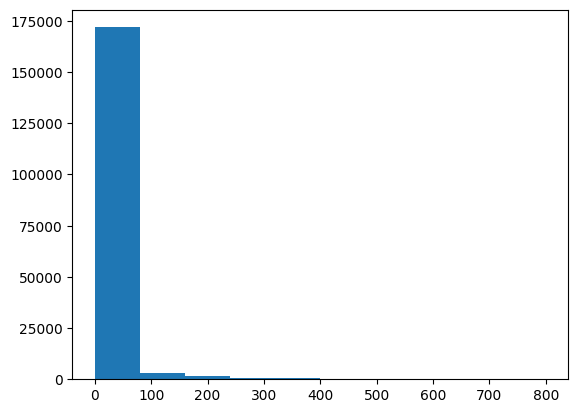

In [39]:
plt.hist(wordFreq[1], bins=10, range=(0, 800))
plt.show()

In [40]:
# plt.plot(wordFreq[0], wordFreq[1])
# plt.show()

In [41]:
tk = Tokenizer(num_words=WORD_NUMS,oov_token=OOV)

In [42]:
tk.fit_on_texts(imdb_DF.review)

- 텍스트 길이 결정 ==> review 길이 가변이므로

In [43]:
# 텍스트 ==> 숫자로 변환
seqText = tk.texts_to_sequences(imdb_DF.review)

In [44]:
seqText

[[145,
  1,
  38,
  569,
  21,
  497,
  179,
  771,
  22,
  269,
  1034,
  175,
  1352,
  1423,
  1,
  1,
  66,
  897,
  563,
  469,
  1,
  1,
  418,
  8,
  38,
  1,
  2,
  1,
  1302,
  524,
  6,
  12,
  206,
  41,
  1116,
  1,
  1,
  9,
  6,
  1,
  1,
  1,
  92,
  1,
  1,
  1,
  1468,
  1047,
  111,
  42,
  1,
  1475,
  1,
  569,
  2,
  1,
  1,
  5,
  1,
  433,
  54,
  2,
  1,
  968,
  1,
  309,
  59,
  1,
  1],
 [1,
  4,
  8,
  153,
  2,
  45,
  36,
  1215,
  8,
  36,
  39,
  21,
  343,
  545,
  1,
  1165,
  100,
  2,
  29,
  1159,
  566],
 [270,
  1,
  1,
  146,
  1,
  119,
  1,
  1636,
  160,
  103,
  1,
  190,
  1,
  1,
  1,
  255,
  306,
  1,
  1,
  68,
  478,
  1,
  374,
  232,
  994,
  77,
  5,
  7,
  403,
  76,
  1,
  306,
  77,
  494,
  1,
  1,
  169,
  788,
  299,
  57,
  1,
  1,
  1,
  1554,
  1,
  1,
  482,
  310,
  1554,
  1,
  297,
  278,
  232,
  1336,
  374,
  158,
  1648,
  360,
  374,
  1,
  158,
  981,
  969,
  691,
  308,
  1667,
  737,
  9,
  454,
  79,
  1364,
  

In [45]:
# decide padding length
seqTextLen = [len(text) for text in seqText]
min(seqTextLen), max(seqTextLen), np.median(seqTextLen)

(0, 1383, 89.0)

In [46]:
TEXT_LENGTH = int(np.median(seqTextLen))

- 모든 텍스트 길이 일치 ==> Padding

In [47]:
# 학습으로 사용할 데이터
textData = pad_sequences(seqText, maxlen=TEXT_LENGTH)

type(textData), textData.shape, imdb_DF.sentiment.shape

(numpy.ndarray, (49582, 89), (49582,))

In [48]:
textLabel = imdb_DF.sentiment

##### [3-2] 학습 / 검증 / 테스트 데이터 준비

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(textData, textLabel,
                                                    stratify=textLabel,
                                                    test_size=0.2)

In [51]:
X_train.shape, y_train.shape

((39665, 89), (39665,))

In [52]:
X_test.shape, y_test.shape

((9917, 89), (9917,))

#### [4] 모델 설계 및 생성
- 전체 단어 사전의 단어 수 ==> VOCA_SIZE
- 사용하는 단어 수 ==> WORD_NUMS
- 1문장에 사용하는 단어 구성 수 ==> TEXT_LENGTH

- WORD_NUMS => 1개 단어를 나타내는 컬럼 수
- TEXT_LENGTH => 1개 문장을 구성하는 단어 수
- 1개 단어 => (TEXT_LENGTH * WORD_NUMS) : (89, 31051)

##### [4-1] RNN Layer에 맞는 Shape로 변환 ==> 3D Tensor

- RNN 입력 형태로 변환 ==> (배치사이즈, 타임스탬프, 피쳐수) ==> (배치사이즈, TEXT_LENGTH, WORD_NUMS) 

In [53]:
from tensorflow.keras.utils import to_categorical

In [54]:
X_train_oh = to_categorical(X_train[:8000])
y_train_oh = y_train[:8000]

X_test_oh = to_categorical(X_test[:1500])
y_test_oh = y_test[:1500]

In [55]:
X_train_oh.shape, y_train_oh.shape

((8000, 89, 1809), (8000,))

In [56]:
X_test_oh.shape, y_test_oh.shape

((1500, 89, 1809), (1500,))

- 모델 설계
    * Sequential API 방식
    * SimpleRNN 층  <= 입력층
    * Dense 층  <= 출력층

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
model = Sequential()

model.add(SimpleRNN(8, input_shape=(TEXT_LENGTH, WORD_NUMS)))
model.add(Dense(1, activation='sigmoid'))

In [59]:
model.summary()

# 89 (feature)
# (1801 (w) + 1 (b)) * 8

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 14544     
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 14,553
Trainable params: 14,553
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [60]:
model_lstm = Sequential()

model_lstm.add(LSTM(8, input_shape=(TEXT_LENGTH, WORD_NUMS), return_sequences=True))
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1, activation='sigmoid'))

In [61]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 89, 8)             58176     
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 58,729
Trainable params: 58,729
Non-trainable params: 0
_________________________________________________________________


In [67]:
model_lstm.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['acc'])

In [74]:
model_gru = Sequential()

model_gru.add(GRU(8, input_shape=(TEXT_LENGTH, WORD_NUMS), return_sequences=True))
model_gru.add(GRU(8))
model_gru.add(Dense(1, activation='sigmoid'))

In [75]:
model_gru.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 89, 8)             43656     
                                                                 
 gru_3 (GRU)                 (None, 8)                 432       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 44,097
Trainable params: 44,097
Non-trainable params: 0
_________________________________________________________________


In [76]:
model_gru.compile(optimizer='adam',
metrics=['acc'],
loss='binary_crossentropy')

In [63]:
stopES = EarlyStopping(monitor='val_acc',
                       patience=5)

#### [5] 테스트 진행

In [64]:
model.fit(X_train_oh, y_train_oh,
          epochs=15,
          validation_split=0.2,
          callbacks=[stopES])

Epoch 1/15
200/200 [==============================] - 5s 21ms/step - loss: 0.6522 - acc: 0.6175 - val_loss: 0.6241 - val_acc: 0.6413
Epoch 2/15
200/200 [==============================] - 3s 17ms/step - loss: 0.4921 - acc: 0.7936 - val_loss: 0.4667 - val_acc: 0.8056
Epoch 3/15
200/200 [==============================] - 3s 16ms/step - loss: 0.3599 - acc: 0.8609 - val_loss: 0.4380 - val_acc: 0.8000
Epoch 4/15
200/200 [==============================] - 3s 17ms/step - loss: 0.2830 - acc: 0.8945 - val_loss: 0.4623 - val_acc: 0.7837
Epoch 5/15
200/200 [==============================] - 3s 17ms/step - loss: 0.2204 - acc: 0.9203 - val_loss: 0.4514 - val_acc: 0.7937
Epoch 6/15
200/200 [==============================] - 3s 16ms/step - loss: 0.1760 - acc: 0.9434 - val_loss: 0.4798 - val_acc: 0.7937
Epoch 7/15
200/200 [==============================] - 3s 16ms/step - loss: 0.1484 - acc: 0.9567 - val_loss: 0.5107 - val_acc: 0.7675


In [68]:
model_lstm.fit(X_train_oh, y_train_oh,
          epochs=15,
          validation_split=0.2,
          callbacks=[stopES])

Epoch 1/15
200/200 [==============================] - 15s 67ms/step - loss: 0.6118 - acc: 0.6495 - val_loss: 0.4749 - val_acc: 0.7831
Epoch 2/15
200/200 [==============================] - 12s 58ms/step - loss: 0.3853 - acc: 0.8406 - val_loss: 0.4224 - val_acc: 0.8112
Epoch 3/15
200/200 [==============================] - 12s 59ms/step - loss: 0.3031 - acc: 0.8845 - val_loss: 0.4432 - val_acc: 0.7969
Epoch 4/15
200/200 [==============================] - 11s 57ms/step - loss: 0.2588 - acc: 0.9066 - val_loss: 0.4438 - val_acc: 0.7994
Epoch 5/15
200/200 [==============================] - 11s 57ms/step - loss: 0.2244 - acc: 0.9242 - val_loss: 0.4916 - val_acc: 0.8012
Epoch 6/15
200/200 [==============================] - 11s 57ms/step - loss: 0.2000 - acc: 0.9339 - val_loss: 0.5290 - val_acc: 0.8019
Epoch 7/15
200/200 [==============================] - 11s 55ms/step - loss: 0.1775 - acc: 0.9411 - val_loss: 0.5593 - val_acc: 0.7975


In [77]:
model_gru.fit(X_train_oh, y_train_oh,
epochs=15,
validation_split=0.2,
callbacks=[stopES])

Epoch 1/15
200/200 [==============================] - 8s 34ms/step - loss: 0.6528 - acc: 0.5883 - val_loss: 0.5511 - val_acc: 0.7069
Epoch 2/15
200/200 [==============================] - 6s 32ms/step - loss: 0.3906 - acc: 0.8280 - val_loss: 0.4134 - val_acc: 0.8106
Epoch 3/15
200/200 [==============================] - 6s 31ms/step - loss: 0.2941 - acc: 0.8803 - val_loss: 0.4244 - val_acc: 0.8125
Epoch 4/15
200/200 [==============================] - 6s 32ms/step - loss: 0.2435 - acc: 0.9083 - val_loss: 0.4395 - val_acc: 0.8044
Epoch 5/15
200/200 [==============================] - 7s 36ms/step - loss: 0.2028 - acc: 0.9247 - val_loss: 0.4509 - val_acc: 0.8081
Epoch 6/15
200/200 [==============================] - 13s 66ms/step - loss: 0.1666 - acc: 0.9428 - val_loss: 0.5972 - val_acc: 0.7900
Epoch 7/15
200/200 [==============================] - 17s 84ms/step - loss: 0.1390 - acc: 0.9525 - val_loss: 0.5456 - val_acc: 0.7994
Epoch 8/15
200/200 [==============================] - 17s 85ms/step

In [69]:
print(f'VOCA_SIZE : {VOCA_SIZE}, WORD_NUMS : {WORD_NUMS}, TEXT_LENGTH : {TEXT_LENGTH}')

VOCA_SIZE : 179964, WORD_NUMS : 1809, TEXT_LENGTH : 89


In [70]:
model.evaluate(X_train_oh, y_train_oh)

250/250 [==============================] - 4s 18ms/step - loss: 0.2221 - acc: 0.9266


[0.22211991250514984, 0.9266250133514404]

#### [6] 예측 및 저장 여부 결정
- 입력 : 텍스트
- 텍스트 ==> 숫자 : Tokenizer의 text_to_sequences()
    * 임베딩 층을 사용하지 않는 경우 ===> One-Hot-Encoding
    * 임베딩층 사용 ==> 숫자를 그대로
- predict( fit()할 때 사용된 데이터 동일한 shape)

In [71]:
model.predict(X_test_oh)

47/47 [==============================] - 1s 19ms/step


array([[0.6814435 ],
       [0.04386996],
       [0.2230393 ],
       ...,
       [0.98404455],
       [0.03775981],
       [0.9680549 ]], dtype=float32)